In [1]:
# Treinamento de Modelos  
#**Objetivo:** Treinar e comparar Regressão Logística e Random Forest para diagnosticar câncer de mama, escolher o melhor (maior recall) e salvá-lo.

In [2]:
import pandas as pd

# 1) Leia o arquivo CSV
df = pd.read_csv("../data/breast_cancer.csv")

# 2) Dê uma olhada nas primeiras linhas
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# 1) Quantos valores faltantes?
print("Valores nulos por coluna:")
print(df.isnull().sum())

# 2) Estatísticas básicas 
df.describe().T


Valores nulos por coluna:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimen

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [4]:
# 0) Opcional: identifique colunas completamente vazias
empty_cols = [c for c in df.columns if df[c].isnull().all()]
print("Colunas sem nenhum valor:", empty_cols)

# 1) Remova essas colunas do seu DataFrame
df = df.drop(columns=empty_cols)

# 2) Separe X e y novamente
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"].map({"B": 0, "M": 1})

# 3) Monte e aplique o pipeline normalmente
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_preprocessed = preprocess_pipeline.fit_transform(X)


Colunas sem nenhum valor: ['Unnamed: 32']


In [5]:
from sklearn.model_selection import train_test_split

# 1) Primeiro, separa 15% para teste
X_temp, X_test, y_temp, y_test = train_test_split(
    X_preprocessed, y, test_size=0.15, random_state=42, stratify=y)

# 2) Do restante (85%), pega 15% para validação → 0.15/0.85 ≈ 0.1765
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

print(f"Tamanhos → Treino: {len(X_train)}, Validação: {len(X_val)}, Teste: {len(X_test)}")


Tamanhos → Treino: 397, Validação: 86, Teste: 86


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Pipeline Regressão Logística
pipe_lr = Pipeline([
    *preprocess_pipeline.steps,
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

# Pipeline Random Forest
pipe_rf = Pipeline([
    *preprocess_pipeline.steps,
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treine ambos
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)


,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [7]:
from sklearn.metrics import classification_report

for name, model in [("Logistic Regression", pipe_lr), ("Random Forest", pipe_rf)]:
    y_pred = model.predict(X_val)
    print(f"\n=== {name} ===")
    print(classification_report(y_val, y_pred, target_names=["Benigno","Maligno"]))



=== Logistic Regression ===
              precision    recall  f1-score   support

     Benigno       0.98      0.98      0.98        54
     Maligno       0.97      0.97      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86


=== Random Forest ===
              precision    recall  f1-score   support

     Benigno       0.95      0.98      0.96        54
     Maligno       0.97      0.91      0.94        32

    accuracy                           0.95        86
   macro avg       0.96      0.94      0.95        86
weighted avg       0.95      0.95      0.95        86



In [8]:
# Escolha do modelo:
best_model = pipe_lr  


In [9]:
import numpy as np

# 1) Recupere coeficientes
coef = best_model.named_steps["clf"].coef_[0]  
feat_names = X.columns

# 2) Ordene pelos valores absolutos (top 10)
idx = np.argsort(np.abs(coef))[::-1][:10]
print("Top-10 features por impacto no diagnóstico de maligno:\n")
for i in idx:
    sinal = "↑" if coef[i] > 0 else "↓"
    print(f"{feat_names[i]:30s} {sinal} coef={coef[i]:.4f}")


Top-10 features por impacto no diagnóstico de maligno:

radius_se                      ↑ coef=1.3176
texture_worst                  ↑ coef=1.2097
radius_worst                   ↑ coef=0.9406
area_worst                     ↑ coef=0.8963
area_se                        ↑ coef=0.8834
perimeter_se                   ↑ coef=0.8441
concave points_mean            ↑ coef=0.8224
perimeter_worst                ↑ coef=0.8176
symmetry_worst                 ↑ coef=0.8090
compactness_se                 ↓ coef=-0.7827


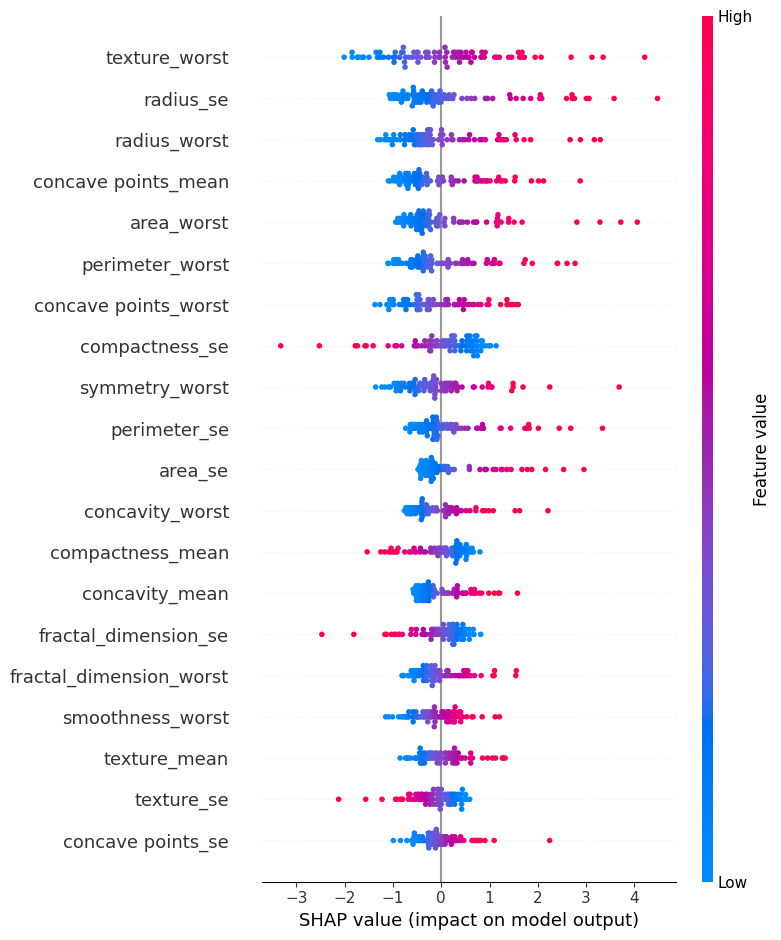

In [10]:
import shap
import matplotlib.pyplot as plt  # agora disponível

# 1) Crie um masker com dados de treino (pré-processados)
masker = shap.maskers.Independent(data=preprocess_pipeline.transform(X_train))

# 2) Crie o explainer usando o masker
explainer = shap.Explainer(
    best_model.named_steps["clf"],
    masker=masker
)

# 3) Calcule os valores SHAP para o conjunto de validação
shap_values = explainer(preprocess_pipeline.transform(X_val))

# 4) Desenhe o summary plot
shap.summary_plot(
    shap_values, 
    features=X_val, 
    feature_names=X.columns,
    show=True
)


In [13]:
import os
import joblib

# 1) Defina o caminho até a pasta 'models' na raiz do projeto
models_path = os.path.join(os.pardir, "models")

# 2) Crie a pasta (e quaisquer subpastas) caso ela não exista
os.makedirs(models_path, exist_ok=True)

# 3) Salve o modelo
file_path = os.path.join(models_path, "best_model.pkl")
joblib.dump(best_model, file_path)

print(f"Modelo salvo em {file_path}")


Modelo salvo em ..\models\best_model.pkl
